In [122]:
import re
import csv
import sys
import random
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
# function formatCreationDateColumn    
# parameter : table
# returns : table 
# Summary : Converts the creationDate field into a datetime format
def formatCreationDateColumn(table_provided):
    table = table_provided.copy()
    #Correcting format of dates in the table
    table[' CreationDate']=pd.to_datetime(table[' CreationDate'],errors="coerce")
    
    #remove lines which could not be formatted to correct date format
    table=table.loc[~table[" CreationDate"].isnull()]
    
    return(table)

def formatCreationDateColumn1(table_provided):
    table = table_provided.copy()
    #Correcting format of dates in the table
    table['CreationDate']=pd.to_datetime(table['CreationDate'],errors="coerce")
    
    #remove lines which could not be formatted to correct date format
    table=table.loc[~table["CreationDate"].isnull()]
    
    return(table)

In [124]:
## READ TABLES

# import tables for Java, python and R
rUsers= pd.read_csv("r_users.csv")
pythonUsers= pd.read_csv("python_users.csv")
javaUsers=pd.read_csv("java_users.csv") 

#javaQuestions = pd.read_csv("java_questions.csv",sep=";",error_bad_lines=False)
#pythonQuestions= pd.read_csv("python_questions.csv",error_bad_lines=False)
#rQuestions= pd.read_csv("r_questions.csv")

#javaAnswers = pd.read_csv("java_answers.csv",error_bad_lines=False)
#pythonAnswers = pd.read_csv("python_answers.csv",error_bad_lines=False) 
#rAnswers= pd.read_csv("r_answers.csv")

#read Barbara's metric
rProbAcc=pd.read_csv("rProbAccMetric.csv") 
rProbAcc = rProbAcc.sort_values([' CreationDate'])

# UpMetric creation for every language
rUpMetric = pd.read_csv("rUpMetric.csv") 
rUpMetric = rUpMetric.sort_values([' CreationDate'])

# read Degree metric
rDegree=pd.read_csv("lil_degree.csv") 
rDegree = rDegree.sort_values([' CreationDate'])

# read Nirmal's metric betweeness
rBetween = pd.read_csv("lil_between.csv")

# read Nirmal's new metric
rDegNew = pd.read_csv("lil_deg_new.csv")
rDegNew = rDegNew.sort_values([' CreationDate'])

rBetween = formatCreationDateColumn1(rBetween)
rBetween = rBetween.sort_values(['CreationDate','UserId'])

# read Nirmal's metric 2 closeness
rClose = pd.read_csv("lil_close.csv") 
rClose = formatCreationDateColumn1(rClose)
rClose = rClose.sort_values(['CreationDate', 'UserId'])

# read Nirmal's metric 3 eigen 
rEig = pd.read_csv("lil_eig.csv") 
rEig = formatCreationDateColumn1(rEig)
rEig = rEig.sort_values(['CreationDate','UserId']) 




In [125]:
rSummaryUpMetricAnswer

,Id,OwnerUserId,CreationDate,ParentId,UpMetric,FirstQuestion,FirstAnswer,FirstActivity,Present,DifferenceNumerator,DifferenceDenominator,NormTime,OnlyDate
3,79788,0,2008-09-17 03:51:30.190,79709,0.173913,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,0.008487,3462.026488,0.000002,2008-09-17
8,86804,0,2008-09-17 19:39:37.370,79709,0.108696,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,0.666903,3462.026488,0.000193,2008-09-17
41,476928,0,2009-01-25 00:05:19.107,476726,0.298654,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,129.851414,3462.026488,0.037507,2009-01-25
44,501926,0,2009-02-02 00:42:27.250,501917,0.312226,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,137.877203,3462.026488,0.039826,2009-02-02
62,612573,0,2009-03-04 21:41:41.980,596819,0.329781,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,168.751679,3462.026488,0.048744,2009-03-04
85,750852,0,2009-04-15 08:58:03.103,750786,0.273813,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,210.221368,3462.026488,0.060722,2009-04-15
98,823251,0,2009-05-05 03:50:25.733,750786,0.241582,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,230.007741,3462.026488,0.066437,2009-05-05
104,876778,0,2009-05-18 08:56:02.270,876711,0.220643,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,243.219969,3462.026488,0.070254,2009-05-18
113,969680,0,2009-06-09 12:03:40.747,750786,0.272433,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,265.350276,3462.026488,0.076646,2009-06-09
135,1116218,0,2009-07-12 15:18:02.497,1114699,0.264237,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,298.485250,3462.026488,0.086217,2009-07-12


In [126]:
def filterUsers(perWeekTable):
    perWeekTable = perWeekTable.sort_values('OnlyDate').drop_duplicates(subset=['Week', ' OwnerUserId'], keep='last')
    return perWeekTable

def aggregatePerWeek(summaryTable):
    summaryTable = summaryTable.sort_values(['OnlyDate'])
    uniqueTime = summaryTable['OnlyDate'].unique()

    uniqueTime = pd.DataFrame(uniqueTime)
    uniqueTime= uniqueTime.reset_index()
    uniqueTime= uniqueTime[1:]
    uniqueTime.columns= ['Index','OnlyDate']
    
    uniqueTime.insert(1, 'Day', range(0, 0 + len(uniqueTime)))

    uniqueTime['Week'] = np.where((uniqueTime['Day']%7)==0 , uniqueTime['Day']//7 ,uniqueTime['Day']//7)
    
    summaryTable= summaryTable.merge(uniqueTime, left_on='OnlyDate', right_on='OnlyDate', how='inner')
    
    return(summaryTable)

In [127]:
### Correlation between ProbAcc and UpMetric
rSummaryUpMetricAnswer = rUpMetric
rSummaryUpMetricAnswer['OnlyDate'] = pd.to_datetime(rUpMetric[' CreationDate'],errors="coerce")
rSummaryUpMetricAnswer['OnlyDate'] = rSummaryUpMetricAnswer['OnlyDate'].dt.date
rSummaryUpMetricAnswer= rSummaryUpMetricAnswer.sort_values(['OnlyDate'])
rPerWeekUpMetric = aggregatePerWeek(rUpMetric)
rPerWeekUpMetric = filterUsers(rPerWeekUpMetric)
rPerWeekUpMetric = rPerWeekUpMetric.sort_values(['Week',' OwnerUserId'])

In [128]:
rSummaryProbAccAnswer = rProbAcc
rSummaryProbAccAnswer['OnlyDate'] = pd.to_datetime(rProbAcc[' CreationDate'],errors="coerce")
rSummaryProbAccAnswer['OnlyDate'] = rSummaryProbAccAnswer['OnlyDate'].dt.date
rSummaryProbAccAnswer= rSummaryProbAccAnswer.sort_values(['OnlyDate'])
rPerWeekProbAcc = aggregatePerWeek(rProbAcc)
rPerWeekProbAcc = filterUsers(rPerWeekProbAcc)
rPerWeekProbAcc = rPerWeekProbAcc.sort_values(['Week',' OwnerUserId'])

In [129]:
rSummaryDegreeAnswer = rDegNew
rSummaryDegreeAnswer['OnlyDate'] = pd.to_datetime(rDegNew[' CreationDate'],errors="coerce")
rSummaryDegreeAnswer['OnlyDate'] = rSummaryDegreeAnswer['OnlyDate'].dt.date
rSummaryDegreeAnswer= rSummaryDegreeAnswer.sort_values(['OnlyDate'])
rPerWeekDegree = aggregatePerWeek(rDegNew)
rPerWeekDegree = filterUsers(rPerWeekDegree)
rPerWeekDegree = rPerWeekDegree.sort_values(['Week',' OwnerUserId'])

In [130]:

upMetricVSprobAcc = pd.DataFrame()

rSummaryProbAccAnswer = rSummaryProbAccAnswer.sort_values([' CreationDate',' OwnerUserId'])
rSummaryUpMetricAnswer = rSummaryUpMetricAnswer.sort_values([' CreationDate',' OwnerUserId'])
rSummaryDegreeAnswer = rSummaryDegreeAnswer.sort_values([' CreationDate',' OwnerUserId'])

#rCorrProbDegree = rSummaryProbAccAnswer['ProbAccAnswer'].corr(rSummaryDegreeAnswer['cumnetdeg'],method='spearman')
#rCorrUpDegree = rSummaryUpMetricAnswer['UpMetric'].corr(rSummaryDegreeAnswer['cumnetdeg'],method='spearman')
#rCorrUpProb = rSummaryProbAccAnswer['ProbAccAnswer'].corr(rSummaryUpMetricAnswer['UpMetric'],method='spearman')

upMetricVSprobAcc['cumnetdeg'] = rSummaryDegreeAnswer['cumnetdeg']
upMetricVSprobAcc['ProbAcc'] = rSummaryProbAccAnswer['ProbAccAnswer']
upMetricVSprobAcc['UpMetric'] = rSummaryUpMetricAnswer['UpMetric']
rCorrProbDegree = upMetricVSprobAcc['ProbAcc'].corr(upMetricVSprobAcc['cumnetdeg'],method='spearman')
rCorrUpDegree = upMetricVSprobAcc['UpMetric'].corr(upMetricVSprobAcc['cumnetdeg'],method='spearman')
rCorrUpProb = upMetricVSprobAcc['ProbAcc'].corr(upMetricVSprobAcc['UpMetric'],method='spearman')
print('Correlation between UpMetric and ProbAcc')
print(rCorrUpProb)
print('Correlation between ProbAcc and Degree')
print(rCorrProbDegree)
print('Correlation between UpMetric and Degree')
print(rCorrUpDegree)

Correlation between UpMetric and ProbAcc
0.6587815319788324
Correlation between ProbAcc and Degree
0.4118143431948563
Correlation between UpMetric and Degree
0.43499258600688795


### rSummaryUpMetricAnswer

In [131]:
rSummaryDegreeAnswer

,Unnamed: 0,Id,OwnerUserId,CreationDate,LastActivityDate,Score,ParentId,CommentCount,cumnetdeg,OnlyDate
1461,1461,79741,3259,2008-09-17 03:43:22.923,2008-09-17T03:43:22.923,-1,79709,1,1,2008-09-17
1518,1518,79768,6043,2008-09-17 03:48:29.900,2008-09-17T03:48:29.900,10,79709,0,1,2008-09-17
1608,1608,79779,8002,2008-09-17 03:49:36.560,2008-09-17T03:49:36.560,0,79709,0,1,2008-09-17
0,0,79788,0,2008-09-17 03:51:30.190,2008-09-17T03:51:30.190,4,79709,0,1,2008-09-17
1685,1685,79827,14257,2008-09-17 03:58:26.367,2015-04-16T04:07:55.567,1,79709,0,1,2008-09-17
1700,1700,79893,14928,2008-09-17 04:11:08.660,2008-09-17T04:11:08.660,6,79709,0,1,2008-09-17
1724,1724,83162,15842,2008-09-17 13:27:17.140,2008-09-17T13:27:17.140,82,77434,0,1,2008-09-17
937,937,83222,1428,2008-09-17 13:32:45.113,2015-11-19T19:12:20.690,262,77434,4,1,2008-09-17
1,1,86804,0,2008-09-17 19:39:37.370,2008-09-17T19:39:37.370,1,79709,0,1,2008-09-17
924,924,95598,1179,2008-09-18 18:49:09.870,2008-09-18T18:49:09.870,5,95007,0,1,2008-09-18


In [132]:
########### R Language ###########
## COMPARISON BETWEEN ProbAcc and UpMetric
## UP

##### COMPARISON WITH Reputation ####
# get most recent UpMetric (per Week) score per user
print('Correlation between UpMetric and Reputation')
rUsers= rUsers.sort_values('Id')
lastUpMetricPerUserWithRep = getLastUpMetricPerUser(rSummaryUpMetricAnswer,rUsers)
lastUpMetricPerUserWithRep = lastUpMetricPerUserWithRep.sort_values(' OwnerUserId')

rUsers= rUsers.sort_values('Id')
lastDegreePerUserWithRep = getLastDegreePerUser(rSummaryDegreeAnswer,rUsers)
lastDegreePerUserWithRep = lastDegreePerUserWithRep.sort_values(' OwnerUserId')
print('Correlation between Degree and Reputation')
rCorrDegreeRep = lastDegreePerUserWithRep['cumnetdeg'].corr(lastDegreePerUserWithRep['Reputation'],method='spearman')
print(rCorrDegreeRep)

# Compares UpMetric with Reputation Score
rCorrUpMetricRep = lastUpMetricPerUserWithRep['UpMetric'].corr(lastUpMetricPerUserWithRep['Reputation'],method='spearman')
print(rCorrUpMetricRep)
# get most recent Prob score per user and relates ProbAcc with Reputation
print('Correlation between ProbAcc and Reputation')
lastProbAccPerUserWithRep = getLastProbAccPerUser(rProbAcc,rUsers)
rCorrProbAccRep = lastProbAccPerUserWithRep['ProbAccAnswer'].corr(lastProbAccPerUserWithRep['Reputation'],method='spearman')
print(rCorrProbAccRep)



Correlation between UpMetric and Reputation
Correlation between Degree and Reputation
0.38430429598418425
0.38549923169941913
Correlation between ProbAcc and Reputation
0.3315679385561568


In [133]:
# corr between network features

print('Correlation between Betweenness and Eigen Centrality')
rCorrEigBet = rEig['EigenCen'].corr(rBetween['Betweenness'],method='spearman')
print(rCorrEigBet)
print('Correlation between Closeness and Eigen Centrality')
rCorrEigClo = rEig['EigenCen'].corr(rClose['Closness'],method='spearman')
print(rCorrEigClo)
print('Correlation between Betweenness and Closeness')
rCorrBetClo = rBetween['Betweenness'].corr(rClose['Closness'],method='spearman')
print(rCorrBetClo)



Correlation between Betweenness and Eigen Centrality
0.7089999067265067
Correlation between Closeness and Eigen Centrality
0.45664263931685395
Correlation between Betweenness and Closeness
0.12281515716175004


In [134]:
def getLastEigPerUser(table,usersTable):
   
    table = table.sort_values('CreationDate').drop_duplicates(subset=['UserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values('UserId')
    answersWithScore = table.merge(usersTable, left_on='UserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['CreationDate', 'UserId','EigenCen','Reputation'])
    table = table.sort_values('UserId')
    return table


def getLastBetPerUser(table,usersTable):

    table = table.sort_values('CreationDate').drop_duplicates(subset=['UserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values('UserId')
    answersWithScore = table.merge(usersTable, left_on='UserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['CreationDate', 'UserId','Betweenness','Reputation'])
    table = table.sort_values('UserId')
    return table
def getLastCloPerUser(table,usersTable):
 
    table = table.sort_values('CreationDate').drop_duplicates(subset=['UserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values('UserId')
    answersWithScore = table.merge(usersTable, left_on='UserId', right_on='Id', how='inner')
   # table = answersWithScore.filter(items=['CreationDate', 'UserId','Closenss','Reputation'])
    table= answersWithScore
   
    table = table.sort_values('UserId')
    
    return table

def getLastUpMetricPerUser(table,usersTable):
    table = table.sort_values('OnlyDate').drop_duplicates(subset=[' OwnerUserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values(' OwnerUserId')
    answersWithScore = table.merge(usersTable, left_on=' OwnerUserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['OnlyDate','Week', ' OwnerUserId','UpMetric','Reputation'])
    table = table.sort_values(' OwnerUserId')
    return table

def getLastDegreePerUser(table,usersTable):
    table = table.sort_values('OnlyDate').drop_duplicates(subset=[' OwnerUserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values(' OwnerUserId')
    answersWithScore = table.merge(usersTable, left_on=' OwnerUserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['OnlyDate','Week', ' OwnerUserId','cumnetdeg','Reputation'])
    table = table.sort_values(' OwnerUserId')
    return table

def getLastProbAccPerUser(table,usersTable):
    table = table.sort_values('OnlyDate').drop_duplicates(subset=[' OwnerUserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values(' OwnerUserId')
    answersWithScore = table.merge(usersTable, left_on=' OwnerUserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['OnlyDate','Week', ' OwnerUserId','ProbAccAnswer','Reputation'])
    table = table.sort_values(' OwnerUserId')
    return table

In [135]:
#Compares Eigen Centrality with Reputation Score
print('Correlation between Eigen and Reputation')
lastEigPerUserWithRep = getLastEigPerUser(rEig,rUsers)
rCorrEigRep = lastEigPerUserWithRep['EigenCen'].corr(lastEigPerUserWithRep['Reputation'],method='spearman')
print(rCorrEigRep)

# Compares Betweenness with Reputation Score
print('Correlation between Betweeness and Reputation')
lastBetPerUserWithRep = getLastBetPerUser(rBetween,rUsers)
rCorrBetRep = lastBetPerUserWithRep['Betweenness'].corr(lastBetPerUserWithRep['Reputation'],method='spearman')
print(rCorrBetRep)

print('Correlation between Closeness and Reputation')
lastCloPerUserWithRep = getLastCloPerUser(rClose,rUsers)
rCorrCloRep = lastCloPerUserWithRep['Closness'].corr(lastCloPerUserWithRep['Reputation'],method='spearman')
print(rCorrCloRep)


Correlation between Eigen and Reputation
0.3619222753579946
Correlation between Betweeness and Reputation
0.26527105841507304
Correlation between Closeness and Reputation
0.28315684212084924


In [136]:
rBetween = rBetween.sort_values(['Week','UserId'])
rClose = rClose.sort_values(['Week','UserId'])
rEig = rEig.sort_values(['Week','UserId'])
rBetProb = rBetween.merge(rPerWeekProbAcc, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'), how='inner')
rCloseProb= rClose.merge(rPerWeekProbAcc, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')
rEigProb= rEig.merge(rPerWeekProbAcc, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')

print('Correlation between ProbAcc and Betweenness')
rCorrProbBet = rBetProb['ProbAccAnswer'].corr(rBetProb['Betweenness'], method='spearman')
print(rCorrProbBet)

print('Correlation between ProbAcc and Closeness')
rCorrProbClo = rCloseProb['ProbAccAnswer'].corr(rCloseProb['Closness'], method='spearman')
print(rCorrProbClo)

print('Correlation between ProbAcc and Eigen')
rCorrProbEig = rEigProb['ProbAccAnswer'].corr(rEigProb['EigenCen'], method='spearman')
print(rCorrProbEig)

Correlation between ProbAcc and Betweenness
0.2473378028779954
Correlation between ProbAcc and Closeness
0.09888823521926829
Correlation between ProbAcc and Eigen
0.3336074991086927


In [137]:
####### 
rBetUp = rBetween.merge(rPerWeekUpMetric, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'), how='inner')
rCloseUp= rClose.merge(rPerWeekUpMetric, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')
rEigUp= rEig.merge(rPerWeekUpMetric, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')

print('Correlation between UpMetric and Betweenness')
rCorrUpBet = rBetUp['UpMetric'].corr(rBetUp['Betweenness'], method='spearman')
print(rCorrUpBet)

print('Correlation between UpMetric and Closeness')
rCorrUpClo = rCloseUp['UpMetric'].corr(rCloseUp['Closness'], method='spearman')
print(rCorrUpClo)

print('Correlation between UpMetric and Eigen')
rCorrUpEig = rEigUp['UpMetric'].corr(rEigUp['EigenCen'], method='spearman')
print(rCorrUpEig)

Correlation between UpMetric and Betweenness
0.23876040853969913
Correlation between UpMetric and Closeness
0.17291373697177592
Correlation between UpMetric and Eigen
0.3060906589582029


In [138]:

### Degree 
rBetDegree = rBetween.merge(rPerWeekDegree, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'), how='inner')
rCloseDegree= rClose.merge(rPerWeekDegree, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')

print('Correlation between Degree and Betweenness')
rCorrDegreeBet = rBetDegree['cumnetdeg'].corr(rBetDegree['Betweenness'], method='spearman')
print(rCorrDegreeBet)

print('Correlation between Degree and Closeness')
rCorrDegreeClo = rCloseDegree['cumnetdeg'].corr(rCloseDegree['Closness'], method='spearman')
print(rCorrDegreeClo)

print('Correlation between Degree and Eigen')
rCorrDegreeEig = rEigDegree['cumnetdeg'].corr(rEigDegree['EigenCen'], method='spearman')
print(rCorrDegreeEig)




Correlation between Degree and Betweenness
0.693806972671059
Correlation between Degree and Closeness
0.25750544249925494
Correlation between Degree and Eigen
0.8014975777859439


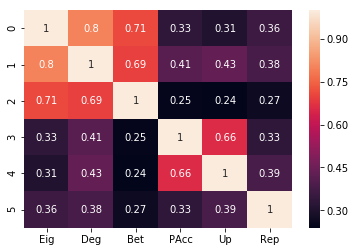

In [144]:
rCorrTable = pd.DataFrame()

#rCorrTable['row'] = ['Eig', 'Clo', 'Bet', 'PAcc','Up','Rep']
rCorrTable['Eig'] = [1,rCorrDegreeEig,rCorrEigBet,rCorrProbEig,rCorrUpEig,rCorrEigRep]
#rCorrTable['Clo'] = [rCorrEigClo,1,rCorrBetClo,rCorrProbClo,rCorrUpClo,rCorrCloRep,rCorrDegreeClo]
rCorrTable['Deg'] = [rCorrDegreeEig,1,rCorrDegreeBet,rCorrProbDegree,rCorrUpDegree,rCorrDegreeRep]
rCorrTable['Bet'] = [rCorrEigBet,rCorrDegreeBet,1,rCorrProbBet,rCorrUpBet,rCorrBetRep]
rCorrTable['PAcc']= [rCorrProbEig,rCorrProbDegree,rCorrProbBet,1,rCorrUpProb,rCorrProbAccRep]
rCorrTable['Up']  = [rCorrUpEig,rCorrUpDegree,rCorrUpBet,rCorrUpProb,1,rCorrUpMetricRep]
rCorrTable['Rep'] = [rCorrEigRep,rCorrDegreeRep,rCorrBetRep,rCorrProbAccRep,rCorrUpMetricRep,1]

#rCorrTable.set_index('row')

matrix = sns.heatmap(rCorrTable, annot=True)
figure = matrix.get_figure()  
figure.savefig('matrix.png')